# Práctica 4 de IA

# 2. Construcción de un clasificador en una base de datos real (3,5 puntos)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
df = pd.read_csv("pima.csv", header=0, sep=',')
print(df.shape)
df.head(5)

(768, 9)


,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,yes
1,1,85,66,29,0,26.6,0.351,31,no
2,8,183,64,0,0,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no
4,0,137,40,35,168,43.1,2.288,33,yes


**El objetivo es predecir si un paciente tiene o no diabetes a partir de los valores de otras variables. La variable target es "class".**

* **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure:** Diastolic blood pressure (mm Hg)
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml)
* **BMI:** Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction:** Diabetes pedigree function
* **Age:** Age (years)
* **Class:** Class variable ("yes" / "no")

In [3]:
nombres_atrs = list(df.columns)
nombres_atrs.remove('class')
print(nombres_atrs)
X = df[nombres_atrs].values
y = df['class'].values


['numPregnant', 'glucose', 'bloodPress', 'skinThick', 'insulin', 'massIndex', 'pedigree', 'age']


**Estadísticos básicos de cada atributo:**

In [4]:
df.describe()

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


**Histogramas suavizados de cada atributo en cada clase. El color indica la clase ("yes"/"no"):**

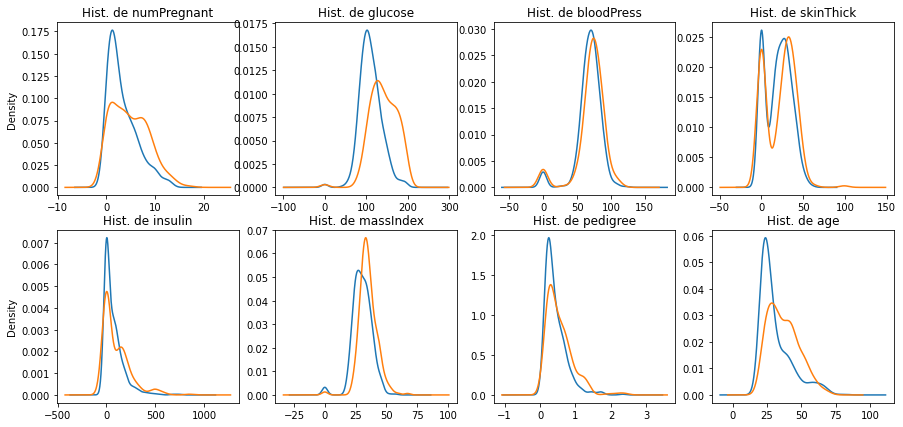

In [6]:
plt.figure(figsize=(15,7))
for i,n in enumerate(nombres_atrs):
    plt.subplot(2,4,i+1)
    aux = 'Density' if i%4==0 else ''
    df.groupby("class")[n].plot(kind='kde', title='Hist. de '+n)
    plt.ylabel(aux)

## Entrenamiento de un modelo y chequeo de su calidad usando 5-fold cross validation

La siguiente celda entrena un modelo y lo evalúa en varias particiones training-test diferentes de los datos. El resultado es un score medio junto a su desviación estándar. El tipo de modelo (Naïve Bayes / árbol de decisión / knn/ regresión logística / red neuronal) y parámetros empleados deberán ser seleccionados para que dicho resultado sea el mejor posible.

El máximo valor de score es 0.7553 y se alcanza en k = 13
El máximo valor de score es 0.7396 y se alcanza en d = 3


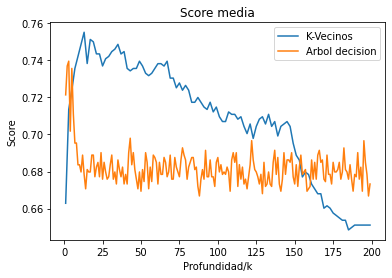

El máximo valor de score es 0.7097 y se alcanza en la siguiente disposicion de capas: (157, 157, 157)


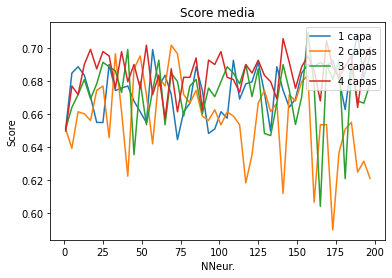

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# otros clasificadores (del notebook p4_01)
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

#for name, clf in classifiers:
#    scores = cross_val_score(clf, X, y, cv=5)
#    print("Todos los scores: ", scores)
#    print("Score global del modelo {}: {:.2f} +/- {:.2f}".format(str(k), scores.mean(), scores.std()))

##############################
# Vecinos proximos variando K:
##############################
grafico = []
rango_knn = range(1,201,2)
for k in rango_knn:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X, y, cv=5)
    grafico.append(scores.mean())
plt.plot(rango_knn,grafico, label = "K-Vecinos")

maximo_knn = max(grafico)
arg_max = grafico.index(maximo_knn)
knn = rango_knn[arg_max]
print('El máximo valor de score es {:.4f} y se alcanza en k = {}'.format(maximo_knn, knn))

####################
# Arbol de decision:
####################
grafico2 = []
rango_arbol = range(1,200)
for d in rango_arbol:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    scores = cross_val_score(clf, X, y, cv=5)
    grafico2.append(scores.mean())
plt.plot(rango_arbol,grafico2, label = "Arbol decision")


maximo_prof = max(grafico2)
arg_max2 = grafico2.index(maximo_prof)
prof = rango_arbol[arg_max2]
print('El máximo valor de score es {:.4f} y se alcanza en d = {}'.format(maximo_prof, prof))

# PLOT
plt.title("Score media")
plt.xlabel("Profundidad/k")
plt.ylabel("Score")
plt.legend(loc="upper right") 
plt.show()

####################
# Red neuronal
####################
grafico3 = [[],[],[],[]]
rango_red = range(1,200,4)
# Una capa:
for nneur in rango_red:
    clf =  MLPClassifier(hidden_layer_sizes=(nneur,), max_iter=10000, alpha=0)
    scores = cross_val_score(clf, X, y, cv=5)
    grafico3[0].append(scores.mean())
plt.plot(rango_red, grafico3[0], label = "1 capa")
maximo_nneur = max(grafico3[0])
arg_max3 = grafico3[0].index(maximo_nneur)
ncapas = 1

for nneur in rango_red:
    clf =  MLPClassifier(hidden_layer_sizes=(nneur,nneur,), max_iter=10000, alpha=0)
    scores = cross_val_score(clf, X, y, cv=5)
    grafico3[1].append(scores.mean())
plt.plot(rango_red, grafico3[1], label = "2 capas")
aux = max(grafico3[1])
if aux > maximo_nneur:
    maximo_nneur = aux
    arg_max3 = grafico3[1].index(aux)
    ncapas = 2

for nneur in rango_red:
    clf =  MLPClassifier(hidden_layer_sizes=(nneur,nneur,nneur,), max_iter=10000, alpha=0)
    scores = cross_val_score(clf, X, y, cv=5)
    grafico3[2].append(scores.mean())
plt.plot(rango_red, grafico3[2], label = "3 capas")
aux = max(grafico3[2])
if aux > maximo_nneur:
    maximo_nneur = aux
    arg_max3 = grafico3[2].index(aux)
    ncapas = 3

for nneur in rango_red:
    clf =  MLPClassifier(hidden_layer_sizes=(nneur,nneur,nneur,nneur,), max_iter=10000, alpha=0)
    scores = cross_val_score(clf, X, y, cv=5)
    grafico3[3].append(scores.mean())
plt.plot(rango_red, grafico3[3], label = "4 capas")
aux = max(grafico3[3])
if aux > maximo_nneur:
    maximo_nneur = aux
    arg_max3 = grafico3[3].index(aux)
    ncapas = 4

if ncapas == 1:
    tupla = (rango_red[arg_max3],)
elif ncapas == 2:
    tupla = (rango_red[arg_max3],rango_red[arg_max3],)
elif ncapas == 3:
    tupla = (rango_red[arg_max3],rango_red[arg_max3],rango_red[arg_max3],)
else:
    tupla = (rango_red[arg_max3],rango_red[arg_max3],rango_red[arg_max3],rango_red[arg_max3],)
print('El máximo valor de score es {:.4f} y se alcanza en la siguiente disposicion de capas: {}'.format(maximo_nneur, tupla))

# PLOT
plt.title("Score media")
plt.xlabel("NNeur.")
plt.ylabel("Score")
plt.legend(loc="upper right") 
plt.show()

## Responde aquí a las siguientes preguntas:

* ¿Cuál es el mejor score que consigues con un k-nn y con qué k (valor de n_neighbours)?
* ¿Cuál es el mejor score que consigues con un árbol de decisión y con qué profundidad máxima (valor de max_depth)?
* ¿Cuál es el mejor score que consigues con una red neuronal y con qué configuración (valor de hidden_layer_sizes)?

Nota: para responder a estas preguntas sólo hay que cambiar el tipo de modelo y sus parámetros en la celda anterior.

Para responder a las dos primeras preguntas, hemos generado una gráfica que contiene los resultados de ejecución para distintos valores del eje de abscisas (profundidad o número de vecinos). Así pues, hemos modificado la celda anterior, de forma que se almacenan las medias globales.

**¿Cuál es el mejor score que consigues con un k-nn y con qué k (valor de n_neighbours)?**

El mejor score que se consigue es 0.7553, con un valor de k = 13. 

En la curva azul de la gráfica se puede observar una subida con gran pendiente hasta k = 13. Después, a grandes rasgos, la función es decreciente (obviando que localmente pueda crecer).

**¿Cuál es el mejor score que consigues con un árbol de decisión y con qué profundidad máxima (valor de max_depth)?**

El mejor score que se consigue es 0.7396, con un valor de d = 3. 

La función de color naranja es máxima en valores del intervalo [1,6]. A partir de este punto, decrece rápidamente hasta estabilizarse en torno a un *score* de 0.68.

**¿Cuál es el mejor score que consigues con una red neuronal y con qué configuración (valor de hidden_layer_sizes)?**

Para responder a esta pregunta, hemos generado una gráfica que contiene los valores de número de neuronas para diferentes cantidades de capas (1,2,3,4), y asumiendo un mismo número de neuronas por capas. Hemos variado el parámetro NNeur en una malla de 1 a 200, tomando valores a distancia 4.

El mejor score se da para cuatro capas, con 17 neruonas por capa. Este resultado puede variar entre ejecución, pero a continuación explicamos las características generales de las cuatro gráficas generadas.
    
- *Gráfica azul (1 capa)*: La configuración con una sola capa resulta ser relativamente estable. Para los primeros valores de número de neuronas, la gráfica azul presenta los peores resultados.
- *Gráficas naranja y verde (2 y 3 capas resp.)*: Ambas gráficas presentan buenos resultados hasta un valor aproximado de 60 neuronas. Después, empiezan a oscilar, alcanzando los valores mínimos de score y arrojando resultados poco estables.
- *Gráfica roja (4 capas)*: La configuración con cuatro capas resulta ser estable y parece dominante a las otras tres gráficas, de media. Es por esta razón que consideramos que 4 capas es la mejor decisión.


## Mejora el modelo: procesamiento de los atributos y búsqueda de parámetros

En ocasiones, en lugar de utilizar modelos más complejos, es más útil invertir más tiempo en el procesamiento de los datos para conseguir mejores resultados.

En este apartado vas a investigar mecanismos para preparar los datos y obtener (en principio) mejores resultados: construcción y selección de atributos, preprocesamiento (detección de outliers, missing values, centrado y escalado).

Razona por qué decides probar o ignorar alguno de estos métodos, y cómo cambian los resultados al aplicarlos (puedes crear tantas celdas como consideres oportunas).

In [5]:
# Centrado y escalado (normalización de la distribución)
medias = []
sd = []
for column in df.describe().columns:
    medias.append(df.describe()[column]['mean'])
    sd.append(df.describe()[column]['std'])

n_col = len(medias)
X_norm = []
for x in X:
    X_aux = [(x[i]-medias[i])/sd[i] for i in range(0,n_col)]
    X_norm.append(X_aux)

X_sin_out = []


In [6]:
# Detección outlayers
# Con las distribuciones normalizadas, es mas fácil identificar la presencia de outliers
# El 99.73% de los datos se encuentran en el soporte [-3,3]
for i in range(0,len(X)):
    a = [(abs(X_norm[i][j]) > 3) for j in range(0,n_col)]
    # Hay un outlier
    if not any(a):
        XAux = list(X[i])
        XAux.append(y[i])
        X_sin_out.append(XAux)

# Recalculamos ahora las medias únicamente para los datos sin outliers
num_datos = len(X_sin_out)
medias = []
sd = []

df_sin_out = pd.DataFrame(X_sin_out, columns = df.columns)

medias = []
sd = []
for column in df_sin_out.describe().columns:
    medias.append(df_sin_out.describe()[column]['mean'])
    sd.append(df_sin_out.describe()[column]['std'])

n_col = len(medias)
X_norm = []
for x in X_sin_out:
    X_aux = [(x[i]-medias[i])/sd[i] for i in range(0,n_col)]
    X_norm.append(X_aux)

#print(df_sin_out.columns)
del df_sin_out['bloodPress'] #Borramos los campos que creemos mas irrelevantes
del df_sin_out['skinThick']
#df_sin_out.head(4)

In [7]:
nombres_atrs_sin_out = list(df_sin_out.columns)
nombres_atrs_sin_out.remove('class')
print(nombres_atrs_sin_out)
X_sin_out = df_sin_out[nombres_atrs_sin_out].values
y_sin_out = df_sin_out['class'].values

['numPregnant', 'glucose', 'insulin', 'massIndex', 'pedigree', 'age']


El máximo valor de score es 0.7573 y se alcanza en k = 9
El máximo valor de score es 0.7486 y se alcanza en d = 5


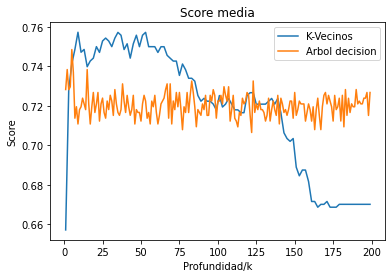

El máximo valor de score es 0.7398 y se alcanza en la siguiente disposicion de capas: (13, 13, 13)


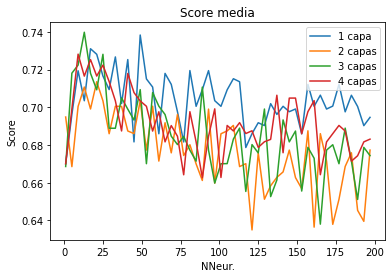

In [10]:
#Misma computacion que arriba pero ahora solo tomamos en cuenta los datos sin outliers y eliminando las
#columnas mas irrelevantes

##############################
# Vecinos proximos variando K:
##############################
grafico = []
rango_knn = range(1,201,2)
for k in rango_knn:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X_sin_out, y_sin_out, cv=5)
    grafico.append(scores.mean())
plt.plot(rango_knn,grafico, label = "K-Vecinos")

maximo_knn = max(grafico)
arg_max = grafico.index(maximo_knn)
knn = rango_knn[arg_max]
print('El máximo valor de score es {:.4f} y se alcanza en k = {}'.format(maximo_knn, knn))

####################
# Arbol de decision:
####################
grafico2 = []
rango_arbol = range(1,200)
for d in rango_arbol:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    scores = cross_val_score(clf, X_sin_out, y_sin_out, cv=5)
    grafico2.append(scores.mean())
plt.plot(rango_arbol,grafico2, label = "Arbol decision")


maximo_prof = max(grafico2)
arg_max2 = grafico2.index(maximo_prof)
prof = rango_arbol[arg_max2]
print('El máximo valor de score es {:.4f} y se alcanza en d = {}'.format(maximo_prof, prof))

# PLOT
plt.title("Score media")
plt.xlabel("Profundidad/k")
plt.ylabel("Score")
plt.legend(loc="upper right") 
plt.show()

####################
# Red neuronal
####################
grafico3 = [[],[],[],[]]
rango_red = range(1,200,4)
# Una capa:
for nneur in rango_red:
    clf =  MLPClassifier(hidden_layer_sizes=(nneur,), max_iter=10000, alpha=0)
    scores = cross_val_score(clf, X_sin_out, y_sin_out, cv=5)
    grafico3[0].append(scores.mean())
plt.plot(rango_red, grafico3[0], label = "1 capa")
maximo_nneur = max(grafico3[0])
arg_max3 = grafico3[0].index(maximo_nneur)
ncapas = 1

for nneur in rango_red:
    clf =  MLPClassifier(hidden_layer_sizes=(nneur,nneur,), max_iter=10000, alpha=0)
    scores = cross_val_score(clf, X_sin_out, y_sin_out, cv=5)
    grafico3[1].append(scores.mean())
plt.plot(rango_red, grafico3[1], label = "2 capas")
aux = max(grafico3[1])
if aux > maximo_nneur:
    maximo_nneur = aux
    arg_max3 = grafico3[1].index(aux)
    ncapas = 2

for nneur in rango_red:
    clf =  MLPClassifier(hidden_layer_sizes=(nneur,nneur,nneur,), max_iter=10000, alpha=0)
    scores = cross_val_score(clf, X_sin_out, y_sin_out, cv=5)
    grafico3[2].append(scores.mean())
plt.plot(rango_red, grafico3[2], label = "3 capas")
aux = max(grafico3[2])
if aux > maximo_nneur:
    maximo_nneur = aux
    arg_max3 = grafico3[2].index(aux)
    ncapas = 3

for nneur in rango_red:
    clf =  MLPClassifier(hidden_layer_sizes=(nneur,nneur,nneur,nneur,), max_iter=10000, alpha=0)
    scores = cross_val_score(clf, X_sin_out, y_sin_out, cv=5)
    grafico3[3].append(scores.mean())
plt.plot(rango_red, grafico3[3], label = "4 capas")
aux = max(grafico3[3])
if aux > maximo_nneur:
    maximo_nneur = aux
    arg_max3 = grafico3[3].index(aux)
    ncapas = 4

if ncapas == 1:
    tupla = (rango_red[arg_max3],)
elif ncapas == 2:
    tupla = (rango_red[arg_max3],rango_red[arg_max3],)
elif ncapas == 3:
    tupla = (rango_red[arg_max3],rango_red[arg_max3],rango_red[arg_max3],)
else:
    tupla = (rango_red[arg_max3],rango_red[arg_max3],rango_red[arg_max3],rango_red[arg_max3],)
print('El máximo valor de score es {:.4f} y se alcanza en la siguiente disposicion de capas: {}'.format(maximo_nneur, tupla))

# PLOT
plt.title("Score media")
plt.xlabel("NNeur.")
plt.ylabel("Score")
plt.legend(loc="upper right") 
plt.show()

Observamos que los resultados mejoran en torno a un 1% el máximo valor de score manteniendo los parámetros en los que se alcanzan estos máximos relativamente cercanos a los obtenidos en la anterior prueba para el caso de vecinos cercanos y árboles de decisión.
Además, se observa que en el caso de la gráfica para árboles de decisión, los valores a partir de profundidad 5 se estabilizan más cerca del máximo, en particular un 6% más que el estudio sin el procesamiento de datos

Sin embargo, en el caso de redes neuronales el resultado mejora más aún, en torno a un 3%, aunque sigue siendo menor que vecinos cercanos y árboles de decisión. También el parámetro es significativamente diferente, antes teníamos cuatro capas de 17 nodos y ahora tenemos dos capas de 9. Una posible explicación es que el espacio muestral antes de eliminar outliers y sin normalizar era mucho más complejo que tras realizar ambas operaciones, y por tanto es más sencillo de generalizar, y más generalizable, obteniendo como clasificador que mejor aproxima el problema uno más simple.

¿Opinas que otra configuración de los hiper-parámetros de los clasificadores utilizados puede resolver el problema más eficientemente? 
Es lo más probable. 

Prueba ahora a cambiar el valor de los hiper-parámetros y a devolver como clasificador final el que minimize la estimación del error de generalización. Para ello hay que hacer dos cosas. La primera, cambiar el modo en el que estimamos el error de generalización. Si basamos nuestro resultado en el error proporcionado por el test, haremos overfitting en el conjunto de test. Por ello debemos cambiar esta estimación. Estimaremos el error de generalización de cada clasificador usando Nested Cross Validation. 
Por otro lado, haremos una búsqueda en rejilla de los hiper-parámetros óptimos. Devolveremos el valor de los hiper-parámetros que optimize esa estimación del error. 

Adapta el código que encontrarás en https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html a este problema y al espacio de hiper-parámetros de uno de los clasificadores. 
Recuerda que en https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier y en https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier tienes información sobre cada uno de los hiper-parámetros. Eres libre de elegir los valores y los hiper-parámetros que consideres. Antes de configurar la rejilla, lee un poco sobre cada uno de los hiper-parámetros para asegurarte que tiene sentido tu búsqueda.

Average difference of 0.015213 with std. dev. of 0.008012.


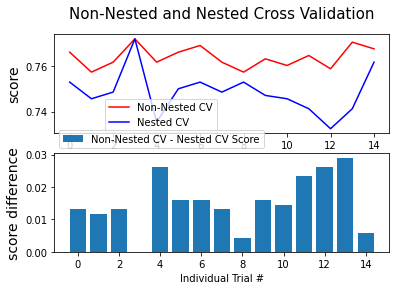

In [10]:
# incluye aquí código sobre este apartado
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Number of random trials
NUM_TRIALS = 15

# Load the dataset
X = X_sin_out
y = y_sin_out

# Set up possible values of parameters to optimize over
p_grid = {"n_neighbors": [2*i+1 for i in range(25)], "weights": ["uniform", "distance"], "p": [1, 2]}

# We will use a Support Vector Classifier with "rbf" kernel
knn = KNeighborsClassifier()

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=knn, param_grid=p_grid, cv=outer_cv)
    clf.fit(X, y)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    clf = GridSearchCV(estimator=knn, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print(
    "Average difference of {:6f} with std. dev. of {:6f}.".format(
        score_difference.mean(), score_difference.std()
    )
)

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
(non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
(nested_line,) = plt.plot(nested_scores, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_scores_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Non-Nested and Nested Cross Validation",
    x=0.5,
    y=1.1,
    fontsize="15",
)

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="14")

plt.show()

Average difference of 0.016473 with std. dev. of 0.012701.


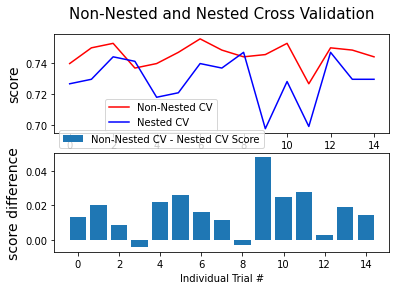

In [13]:
from sklearn.tree import DecisionTreeClassifier

NUM_TRIALS = 15

# Load the dataset
X = X_sin_out
y = y_sin_out

# Set up possible values of parameters to optimize over
p_grid = {"criterion": ["gini", "entropy"], "max_depth": [2*i+1 for i in range(10)]}
    
# We will use a Support Vector Classifier with "rbf" kernel
tree = DecisionTreeClassifier()

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=tree, param_grid=p_grid, cv=outer_cv)
    clf.fit(X, y)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    clf = GridSearchCV(estimator=tree, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print(
    "Average difference of {:6f} with std. dev. of {:6f}.".format(
        score_difference.mean(), score_difference.std()
    )
)

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
(non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
(nested_line,) = plt.plot(nested_scores, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_scores_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Non-Nested and Nested Cross Validation",
    x=0.5,
    y=1.1,
    fontsize="15",
)

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="14")

plt.show()

d:\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum 

Average difference of 0.040282 with std. dev. of 0.021230.


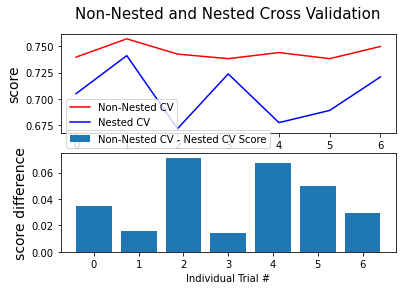

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

NUM_TRIALS = 7

# Load the dataset
X = X_sin_out
y = y_sin_out

# Set up possible values of parameters to optimize over
p_grid = {"early_stopping": [True, False], "learning_rate_init": [0.0001, 0.001, 0.01, 0.1, 1], "hidden_layer_sizes": [(2,), (10,), (2,2,), (10,10,), (2,2,2,), (10,10,10,)], "alpha": [0.0001, 0.001, 0.01, 0.1, 1]}
    
# We will use a Support Vector Classifier with "rbf" kernel
red = MLPClassifier()

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=red, param_grid=p_grid, cv=outer_cv)
    clf.fit(X, y)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    clf = GridSearchCV(estimator=red, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print(
    "Average difference of {:6f} with std. dev. of {:6f}.".format(
        score_difference.mean(), score_difference.std()
    )
)

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
(non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
(nested_line,) = plt.plot(nested_scores, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_scores_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Non-Nested and Nested Cross Validation",
    x=0.5,
    y=1.1,
    fontsize="15",
)

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="14")

plt.show()

Podemos observar, fijándonos en que la línea roja se encuentra por encima de la azul y que la gráfica inferior es mayoritariamnete positiva, que en todos los casos los resultados para la validación no anidada es usualmente mayor que la anidada, como cabría esperar, ya que los estimadores están creados basados en los datos que lo prueban, mientras que en la no anidada se utilizan datos independientes de los que se utilizaron para entrenar el clasificador. Sin embargo, como el estimador será usado para predecir clases de datos independientes a los de entrenamiento, nos interesa más este segundo valor.

Este valor no se aleja significativamente del primero para los casos de árboles de decisión y vecinos próximos (alrededor del 1.5% en ambos de media, alcanzando un máximo en 4% en una ocasión pero igualándolo o mejorándolo en 3 ocasiones), obteniendo un máximo de alrededor de 0.77 en score. Sin embargo, en redes neuronales los valores de score que obtiene la validación anidada no se acercan a la no anidada como en los casos anteriores, quedándose a un 4% de media, cuando en árboles de decisión y vecinos próximos esta era la diferencia máxima. Además los valores de score son significativamente inferiores en redes neuronales.

También debemos explicar que no hemos variado todos los hiperparámetros de los clasificadores, ya que algunos dependen de los otros. Por ejemplo, en el caso de los árboles de decisión no encontrábamos el sentido a variar *min_samples_split* cuando ya variábamos *max_depth* que le afecta directamente. De esta forma, hemos elegido los que consideramos 
fundamentales.